In [1]:
# installing required libraries
%%capture
!pip install -U pandas-profiling
!pip install table_evaluator


In [2]:
#imports

import pandas as pd
import numpy as np
from pathlib import Path
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

# Step 1: preparing the data:


In [3]:
url ='https://www.cs.mun.ca/~tstricco/project/tickets.csv'
df = pd.read_csv(url)
df.loc[df.task_type =='live_chat',:]

,task_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team
29,live_chat,2021-01-03 16:00:11.779996862,2021-01-03 16:00:11.779996862,2021-01-03 16:20:11.779996862,5,False,13b968,green
63,live_chat,2021-01-06 08:34:00.000000000,2021-01-06 08:35:00.000000000,2021-01-06 08:57:00.000000000,3,True,13b968,green
71,live_chat,2021-01-06 13:05:20.828984307,2021-01-06 13:06:20.828984307,2021-01-06 13:25:20.828984307,5,True,13b968,green
85,live_chat,2021-01-07 11:27:00.000000000,2021-01-07 11:28:00.000000000,2021-01-07 11:46:00.000000000,1,False,13b968,green
92,live_chat,2021-01-07 15:37:11.582305560,2021-01-07 15:38:11.582305560,2021-01-07 15:54:11.582305560,5,True,13b968,green
...,...,...,...,...,...,...,...,...
306409,live_chat,2021-12-27 11:27:00.000000000,2021-12-27 11:29:00.000000000,2021-12-27 11:50:00.000000000,3,True,24503c,orange
306410,live_chat,2021-12-27 11:54:00.000000000,2021-12-27 11:54:00.000000000,2021-12-27 12:15:00.000000000,1,False,24503c,orange
306413,live_chat,2021-12-27 14:09:32.373741188,2021-12-27 14:11:32.373741188,2021-12-27 14:34:32.373741188,1,True,24503c,orange
306414,live_chat,2021-12-27 14:38:32.373741188,2021-12-27 14:40:32.373741188,2021-12-27 15:06:32.373741188,3,False,24503c,orange


In [4]:
# Assuming 'df' is your DataFrame
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['view_date'] = pd.to_datetime(df['view_date'])
df['action_date'] = pd.to_datetime(df['action_date'])
# Convert datetime objects to timestamps
df['creation_date'] = df['creation_date'].apply(lambda x: x.timestamp())
df['view_date'] = df['view_date'].apply(lambda x: x.timestamp())
df['action_date'] = df['action_date'].apply(lambda x: x.timestamp())
df.head()


,task_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team
0,email,1.609556e+09,1.609576e+09,1.609578e+09,5,True,13b968,green
1,email,1.609558e+09,1.609578e+09,1.609580e+09,3,True,13b968,green
2,web_form,1.609577e+09,1.609580e+09,1.609582e+09,3,True,13b968,green
3,web_form,1.609579e+09,1.609582e+09,1.609584e+09,2,False,13b968,green
4,email,1.609583e+09,1.609585e+09,1.609587e+09,5,True,13b968,green


In [5]:
# Generate the Profiling Report

profile = ProfileReport(
    df, title="Ticket Dataset", html={"style": {"full_width": True}}, sort=None
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.drop(['user_actioned'], axis=1, inplace=True)

In [7]:
df.columns

Index(['task_type', 'creation_date', 'view_date', 'action_date',
       'customer_satisfaction', 'customer_problem_resolved', 'user_team'],
      dtype='object')

In [8]:
# data configuration



columns_to_drop = ['user_actioned']
categorical_features = ['task_type',
       'customer_satisfaction', 'customer_problem_resolved', 'user_team']
continuous_features = ['creation_date', 'view_date', 'action_date',]
col1,col2= 'task_type','user_team'
col_group_by = 'customer_satisfaction'

# training configuration
noise_dim = 32
dim = 128
batch_size = 32

log_step = 100
epochs = 10000+1
learning_rate = 5e-4
models_dir = 'model'

In [9]:
for column in categorical_features:
  df[column] = df[column].astype('category').cat.codes

df.head()

,task_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_team
0,0,1.609556e+09,1.609576e+09,1.609578e+09,4,1,1
1,0,1.609558e+09,1.609578e+09,1.609580e+09,2,1,1
2,2,1.609577e+09,1.609580e+09,1.609582e+09,2,1,1
3,2,1.609579e+09,1.609582e+09,1.609584e+09,1,0,1
4,0,1.609583e+09,1.609585e+09,1.609587e+09,4,1,1


In [10]:
import numpy as np

def inverse_cut(df,continuous_features):
  for column in continuous_features:
    min = df[column].min()
    max = df[column].max()
    bin_width = (max - min) / 24
    df[column] = df[column] * bin_width + min

for column in continuous_features:
  min = df[column].min()
  max = df[column].max()
  feature_bins = pd.cut(df[column], bins=np.linspace(min, max, 25), labels=False)
  df.drop([column], axis=1, inplace=True)
  df = pd.concat([df, feature_bins], axis=1)


df

,task_type,customer_satisfaction,customer_problem_resolved,user_team,creation_date,view_date,action_date
0,0,4,1,1,0.0,0.0,0.0
1,0,2,1,1,0.0,0.0,0.0
2,2,2,1,1,0.0,0.0,0.0
3,2,1,0,1,0.0,0.0,0.0
4,0,4,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306414,1,2,0,2,23.0,23.0,23.0
306415,0,0,0,2,12.0,23.0,23.0
306416,2,0,0,2,15.0,23.0,23.0
306417,1,0,0,2,23.0,23.0,23.0


In [11]:
from sklearn.preprocessing import PowerTransformer


pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pwt=pw.fit_transform(df[df.columns])

pwt

array([[-1.0784739 ,  1.11337948,  0.8279274 , ..., -1.89314236,
        -1.90256082, -1.90256083],
       [-1.0784739 ,  0.08104473,  0.8279274 , ..., -1.89314236,
        -1.90256082, -1.90256083],
       [ 1.02905614,  0.08104473,  0.8279274 , ..., -1.89314236,
        -1.90256082, -1.90256083],
       ...,
       [ 1.02905614, -1.32641385, -1.20783538, ...,  0.63283661,
         1.52124055,  1.52124054],
       [ 0.193074  , -1.32641385, -1.20783538, ...,  1.58628869,
         1.52124055,  1.52124054],
       [ 1.02905614,  0.08104473,  0.8279274 , ...,  1.58628869,
         1.52124055,  1.52124054]])

In [12]:
df[df.columns]=pwt
df

,task_type,customer_satisfaction,customer_problem_resolved,user_team,creation_date,view_date,action_date
0,-1.078474,1.113379,0.827927,-0.371686,-1.893142,-1.902561,-1.902561
1,-1.078474,0.081045,0.827927,-0.371686,-1.893142,-1.902561,-1.902561
2,1.029056,0.081045,0.827927,-0.371686,-1.893142,-1.902561,-1.902561
3,1.029056,-0.545436,-1.207835,-0.371686,-1.893142,-1.902561,-1.902561
4,-1.078474,1.113379,0.827927,-0.371686,-1.893142,-1.902561,-1.902561
...,...,...,...,...,...,...,...
306414,0.193074,0.081045,-1.207835,0.507490,1.586289,1.521241,1.521241
306415,-1.078474,-1.326414,-1.207835,0.507490,0.238254,1.521241,1.521241
306416,1.029056,-1.326414,-1.207835,0.507490,0.632837,1.521241,1.521241
306417,0.193074,-1.326414,-1.207835,0.507490,1.586289,1.521241,1.521241


# Step 2: Training the model:

In [13]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

from tensorflow.keras.optimizers.legacy import Adam

class GAN():

    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))

    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments

        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))

            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return

    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator

class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size

    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size

    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [14]:
data_cols = df.columns

In [15]:
#Define the GAN and training parameters
df[data_cols] = df[data_cols]

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

7


In [16]:
!mkdir model
!mkdir model/gan
!mkdir model/gan/saved

In [17]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

Streaming output truncated to the last 5000 lines.
7513 [D loss: 0.305628, acc.: 87.50%] [G loss: 2.139418]
1/1 [==============================] - 0s 25ms/step
7514 [D loss: 0.357556, acc.: 82.81%] [G loss: 1.863005]
1/1 [==============================] - 0s 23ms/step
7515 [D loss: 0.310429, acc.: 85.94%] [G loss: 2.176674]
1/1 [==============================] - 0s 21ms/step
7516 [D loss: 0.359206, acc.: 81.25%] [G loss: 2.015981]
1/1 [==============================] - 0s 22ms/step
7517 [D loss: 0.413078, acc.: 78.12%] [G loss: 2.014016]
1/1 [==============================] - 0s 26ms/step
7518 [D loss: 0.329565, acc.: 87.50%] [G loss: 2.712088]
1/1 [==============================] - 0s 20ms/step
7519 [D loss: 0.431974, acc.: 75.00%] [G loss: 1.994649]
1/1 [==============================] - 0s 21ms/step
7520 [D loss: 0.323624, acc.: 84.38%] [G loss: 2.283354]
1/1 [==============================] - 0s 20ms/step
7521 [D loss: 0.340202, acc.: 84.38%] [G loss: 2.386437]
1/1 [===============

In [18]:
!mkdir model/gan
#You can easily save the trained generator and loaded it aftwerwards

synthesizer.save('model/gan/saved', 'syn_gen')

mkdir: cannot create directory ‘model/gan’: File exists


# Step 3: Evaluating the model

In [19]:
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(32, 32)]                0         
                                                                 
 dense (Dense)               (32, 128)                 4224      
                                                                 
 dense_1 (Dense)             (32, 256)                 33024     
                                                                 
 dense_2 (Dense)             (32, 512)                 131584    
                                                                 
 dense_3 (Dense)             (32, 7)                   3591      
                                                                 
Total params: 172,423
Trainable params: 172,423
Non-trainable params: 0
_________________________________________________________________


In [20]:
synthesizer.discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(32, 7)]                 0         
                                                                 
 dense_4 (Dense)             (32, 512)                 4096      
                                                                 
 dropout (Dropout)           (32, 512)                 0         
                                                                 
 dense_5 (Dense)             (32, 256)                 131328    
                                                                 
 dropout_1 (Dropout)         (32, 256)                 0         
                                                                 
 dense_6 (Dense)             (32, 128)                 32896     
                                                                 
 dense_7 (Dense)             (32, 1)                   129 

In [21]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

16/16 [==============================] - 0s 2ms/step


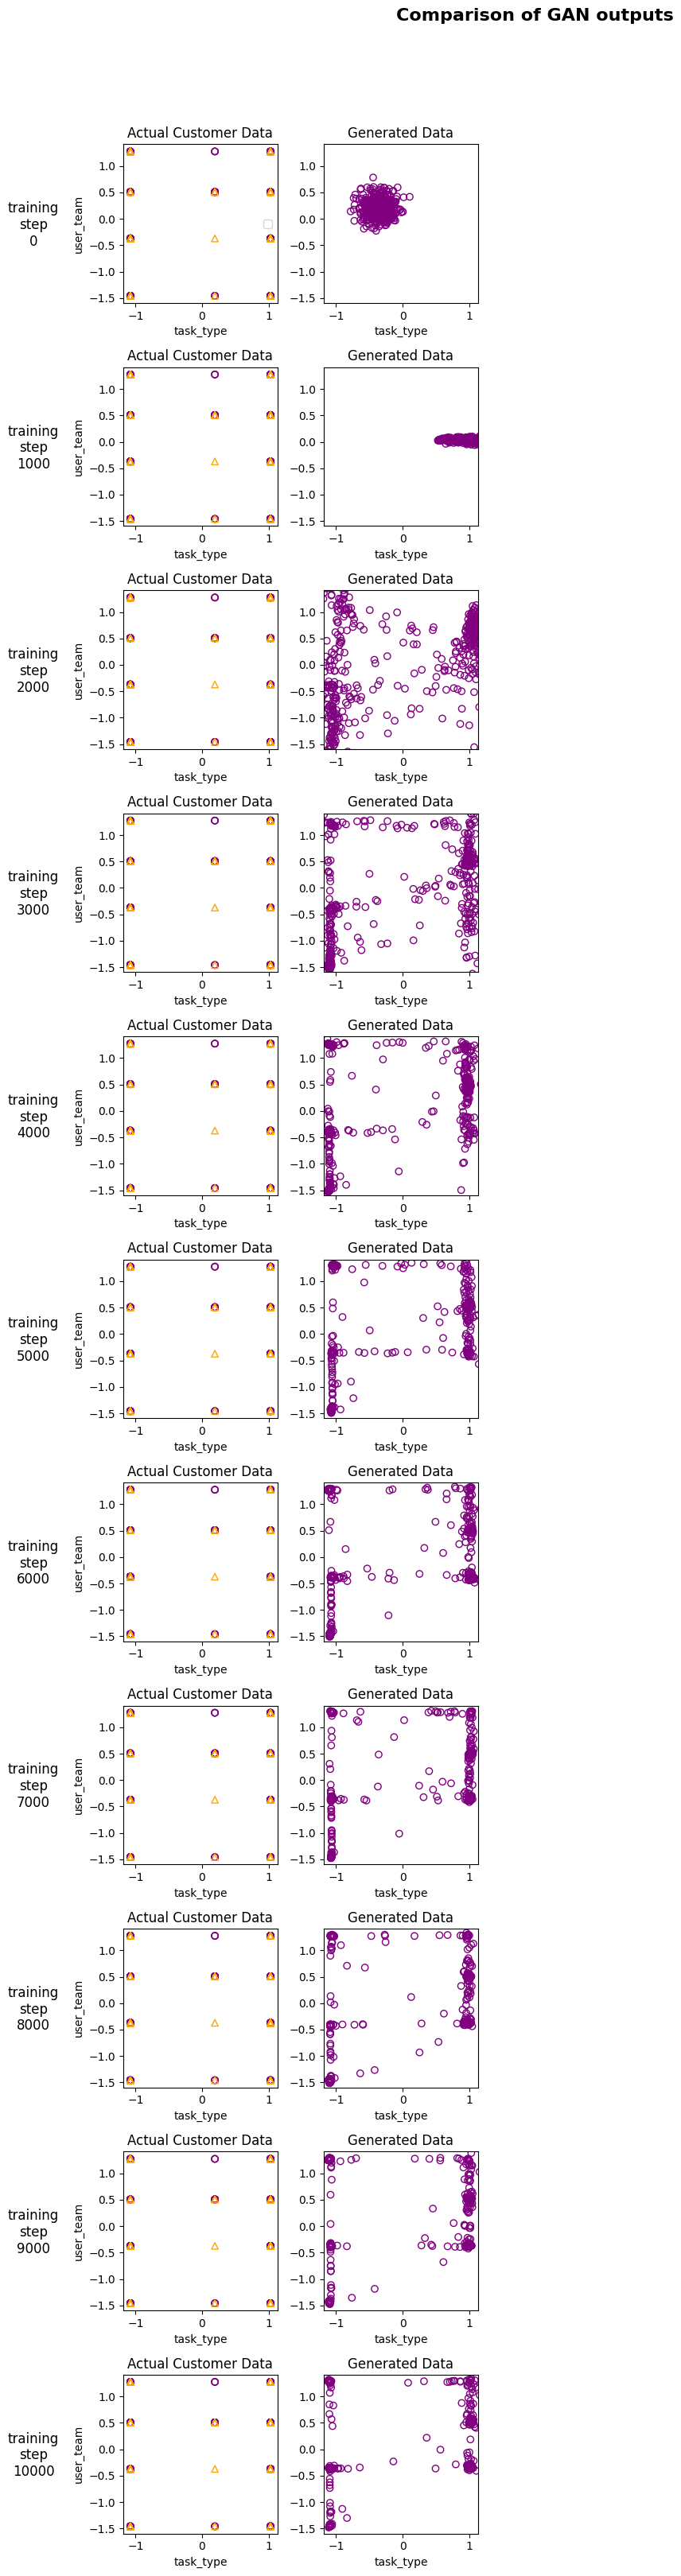

In [22]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['purple','orange']
markers = ['o','^']

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000,9000,10000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    for group, color, marker in zip(real_samples.groupby(col_group_by), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )

    plt.title('Actual Customer Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()

    if model_step_ix == 0:
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')

    i=0
    [model_name, with_class, generator_model] = models['GAN']

    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)

    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

16/16 [==============================] - 0s 5ms/step


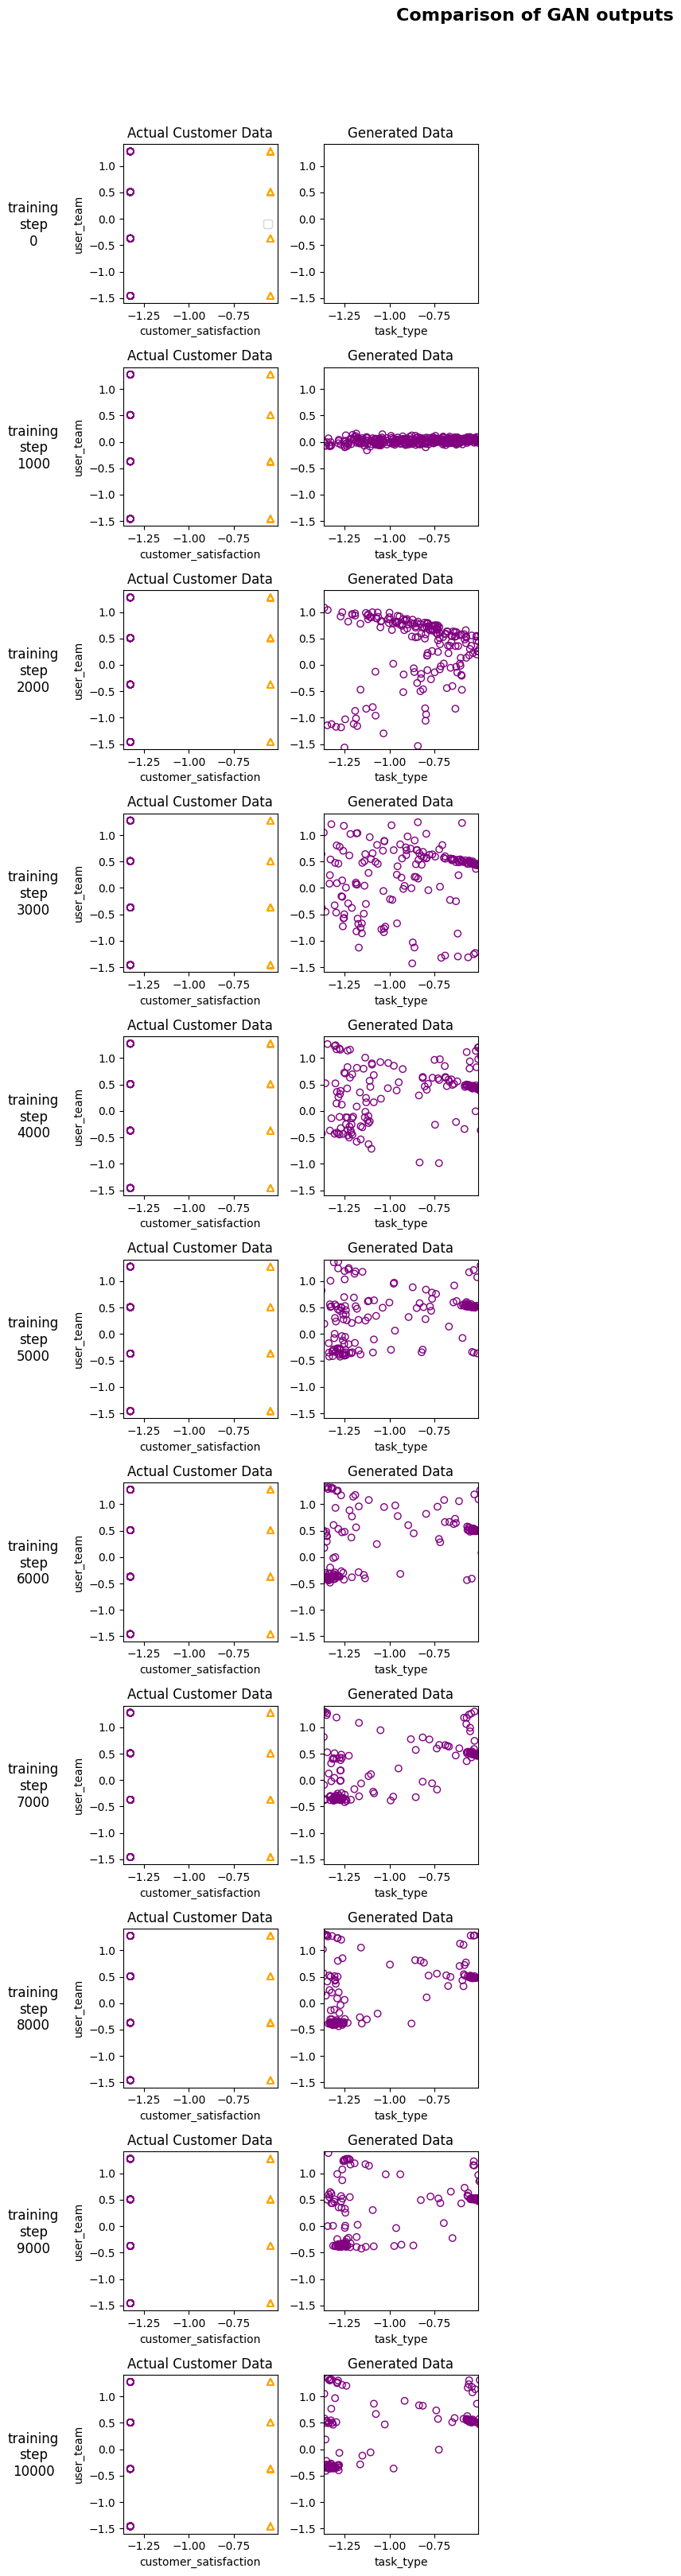

In [26]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32
col1= 'customer_satisfaction'
np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['purple','orange']
markers = ['o','^']

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000,9000,10000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    for group, color, marker in zip(real_samples.groupby(col_group_by), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )

    plt.title('Actual Customer Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()

    if model_step_ix == 0:
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')

    i=0
    [model_name, with_class, generator_model] = models['GAN']

    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)

    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [23]:
g_z=pw.inverse_transform(g_z)
gen_samples = pd.DataFrame(g_z, columns=data_cols)
gen_samples.to_csv('Generated_sample.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [24]:
import pandas as pd
gen_samples = pd.read_csv('Generated_sample.csv')
gen_samples.drop('Unnamed: 0', axis=1, inplace=True)

print(gen_samples.columns)
print( gen_samples.shape)

Index(['task_type', 'customer_satisfaction', 'customer_problem_resolved',
       'user_team', 'creation_date', 'view_date', 'action_date'],
      dtype='object')
(492, 7)


In [25]:
gen_samples.sample()

,task_type,customer_satisfaction,customer_problem_resolved,user_team,creation_date,view_date,action_date
256,2.004945,0.983789,0.009636,2.040584,13.869504,14.967244,14.855296


306419 492


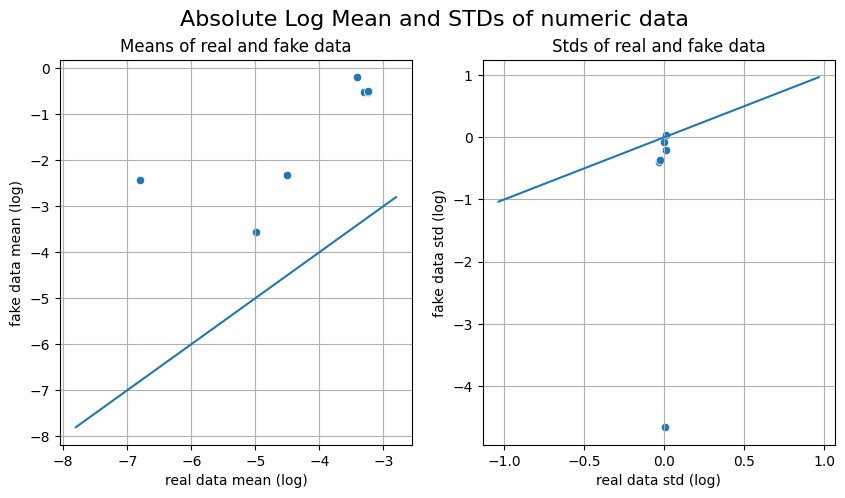

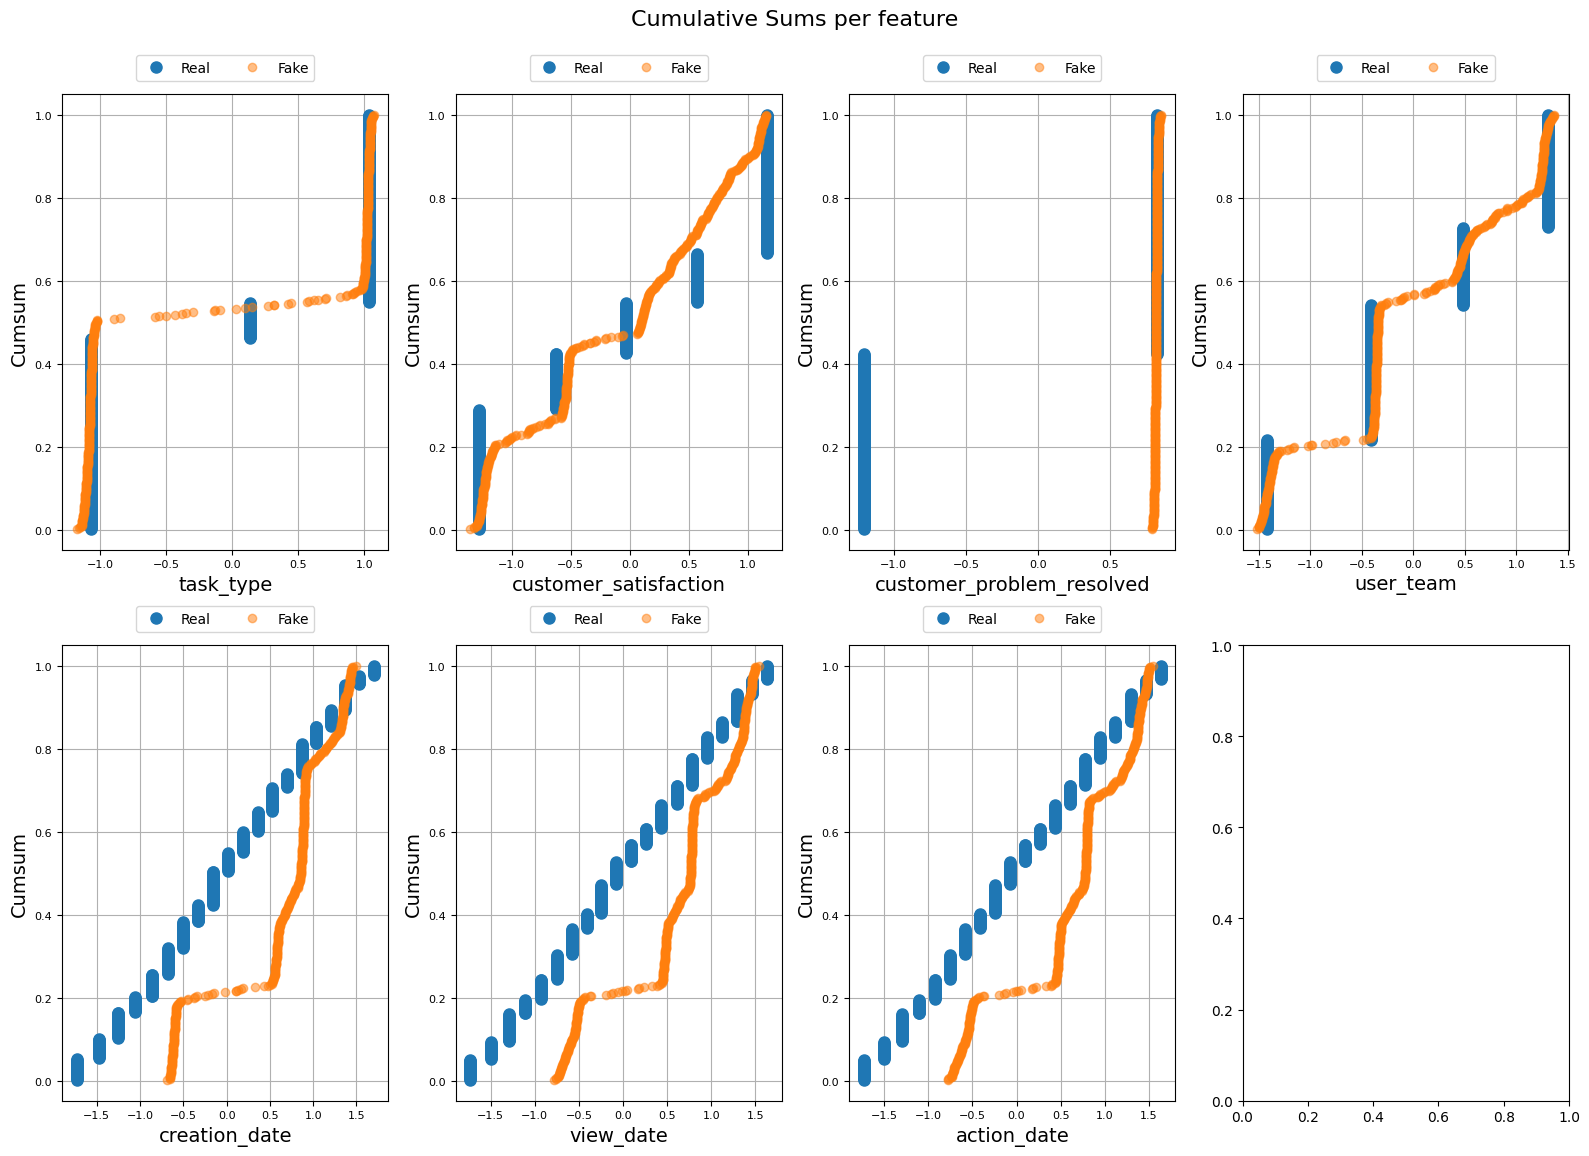

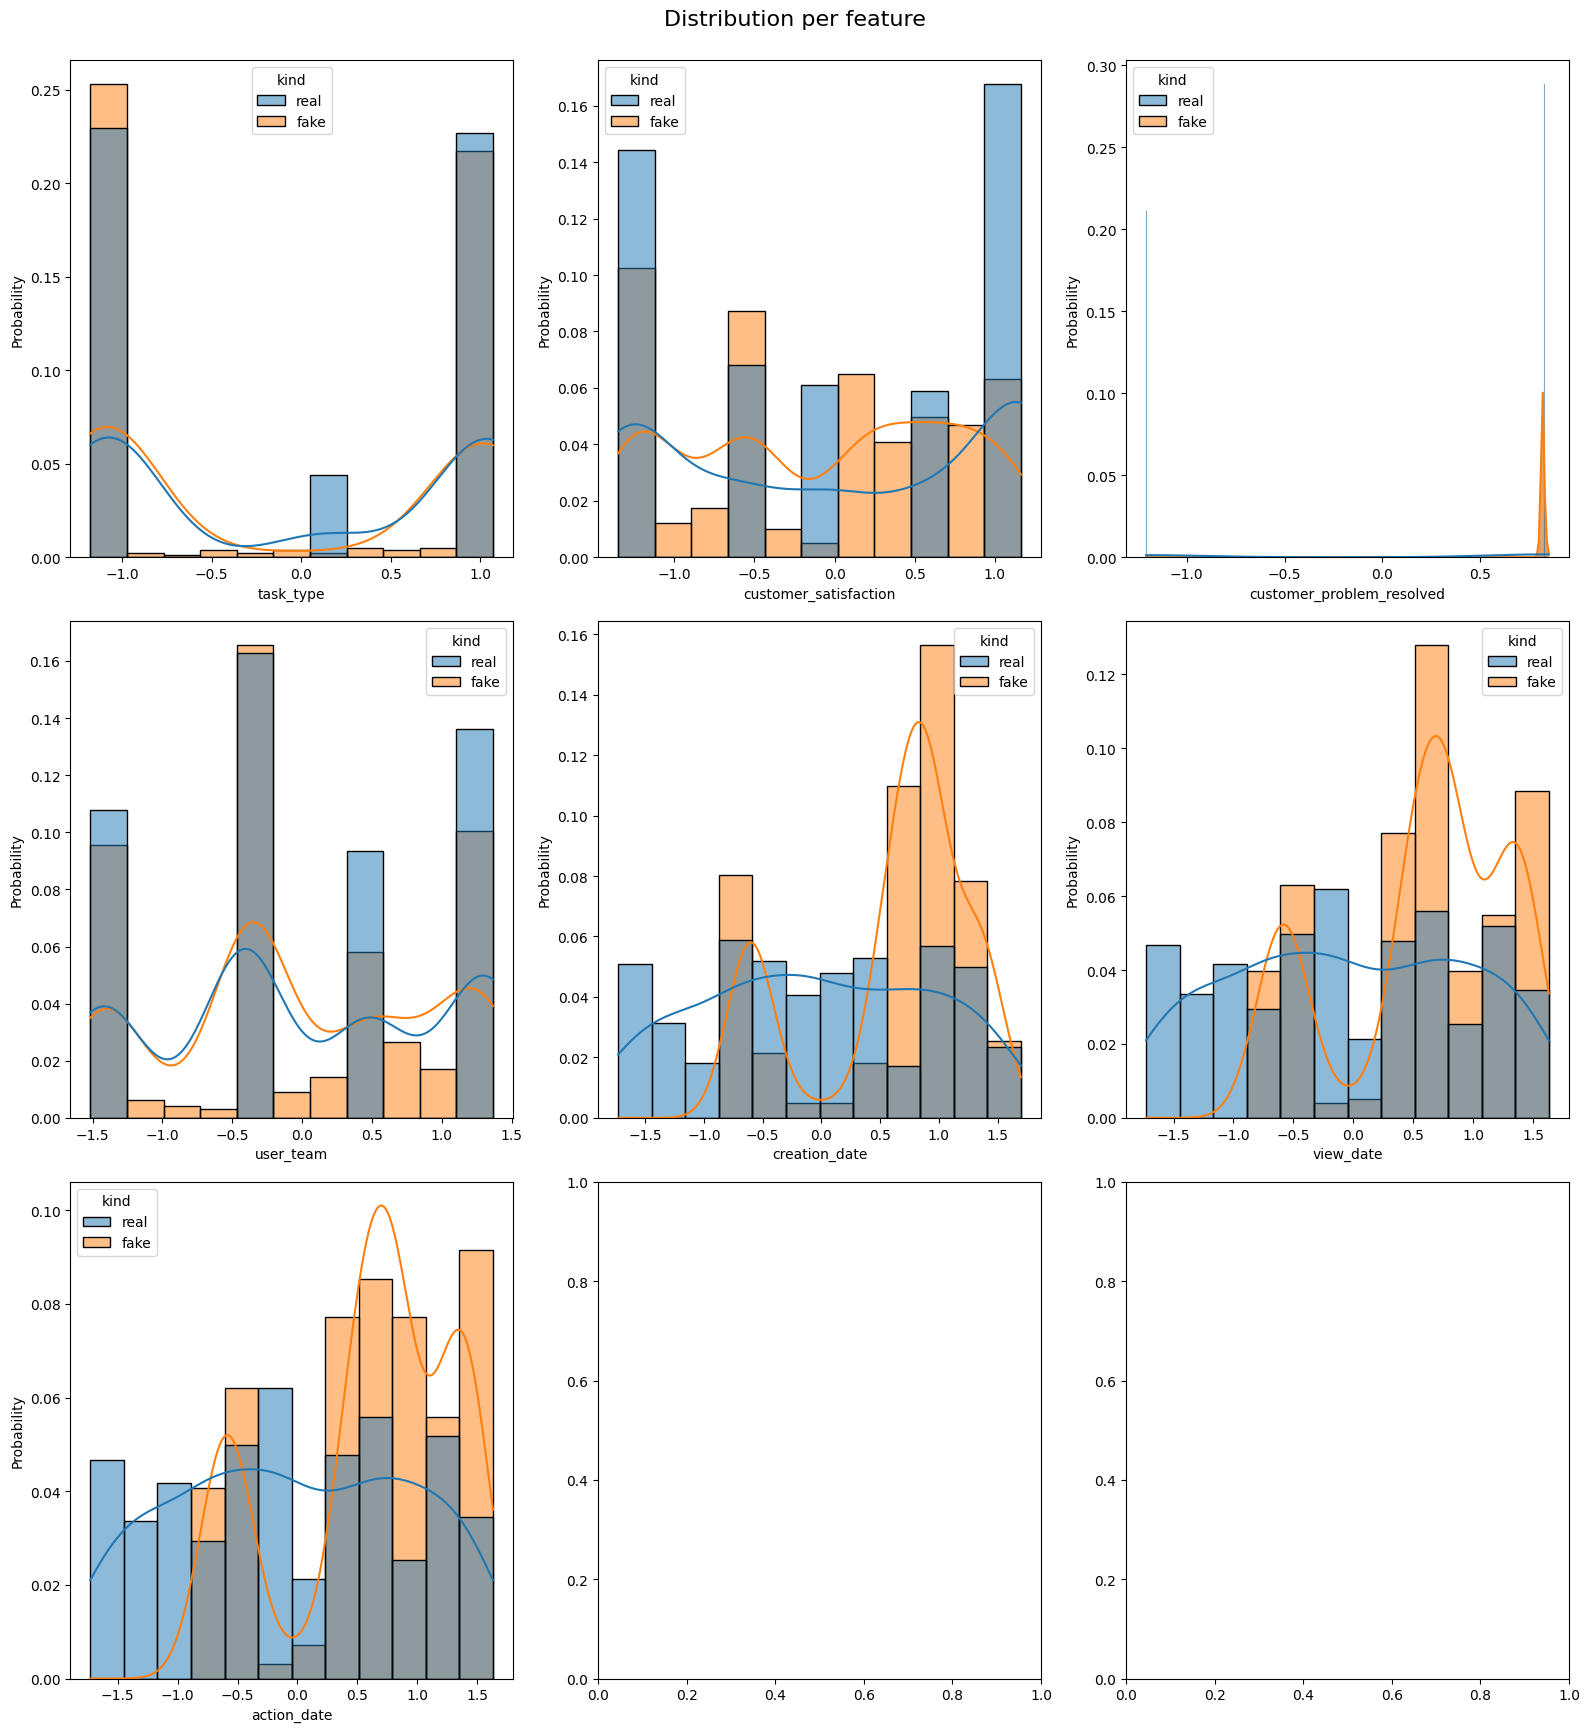

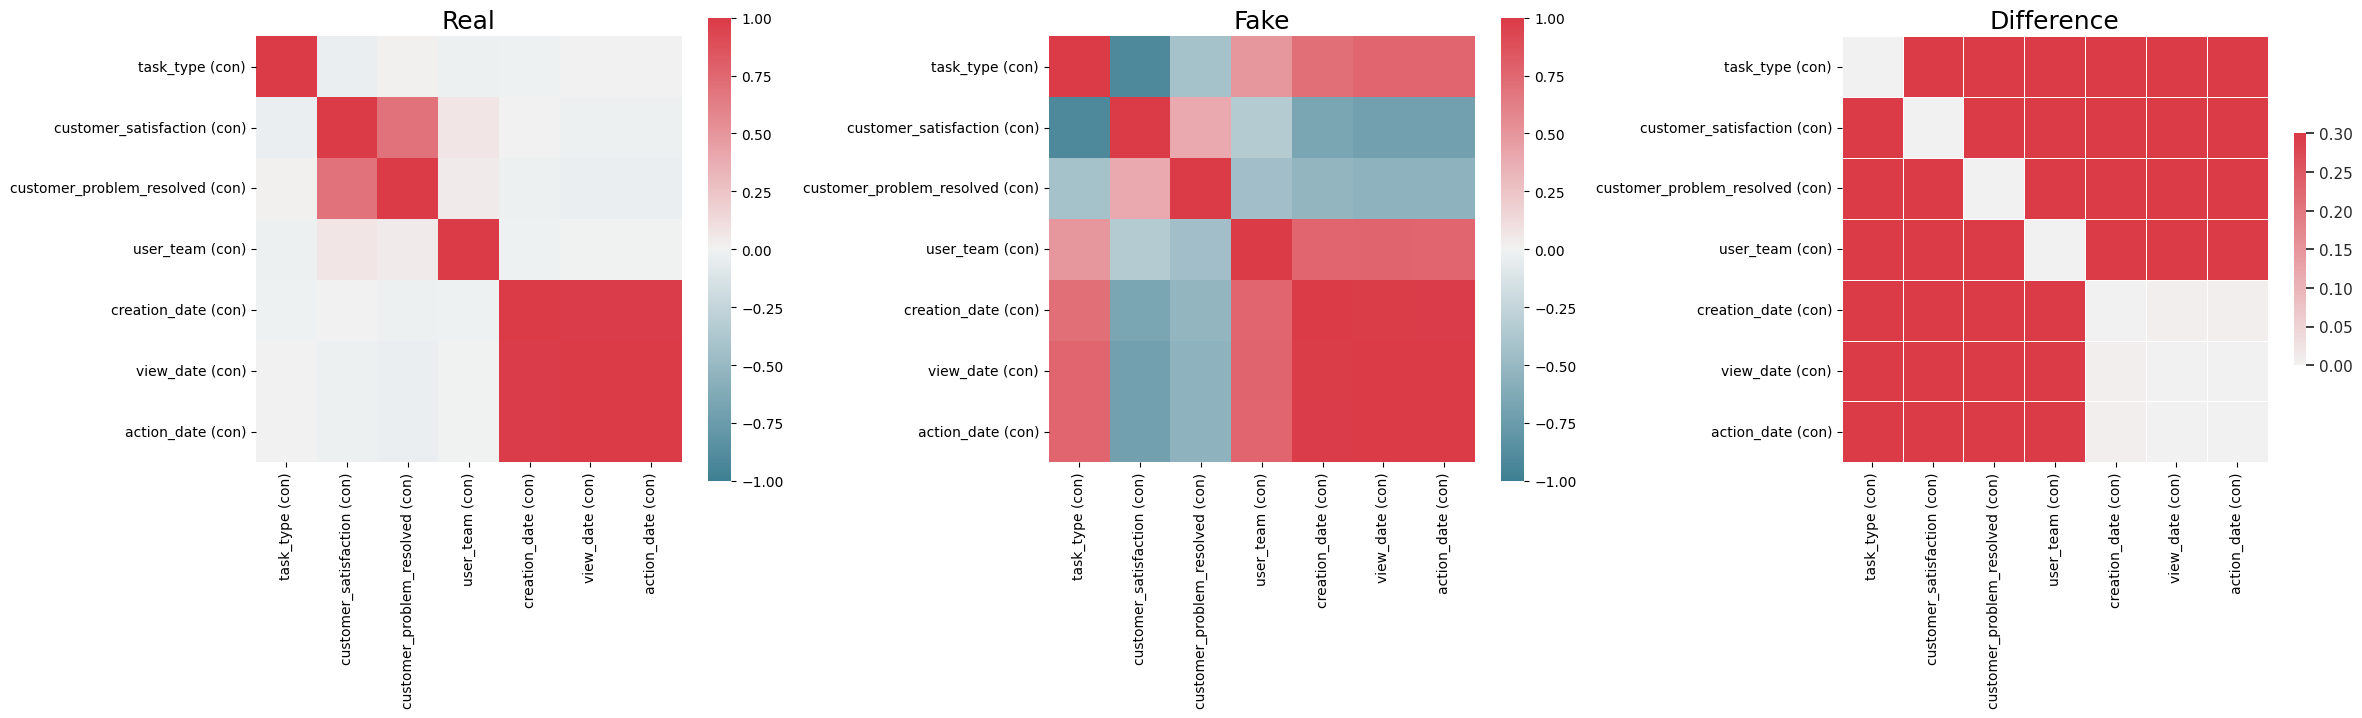

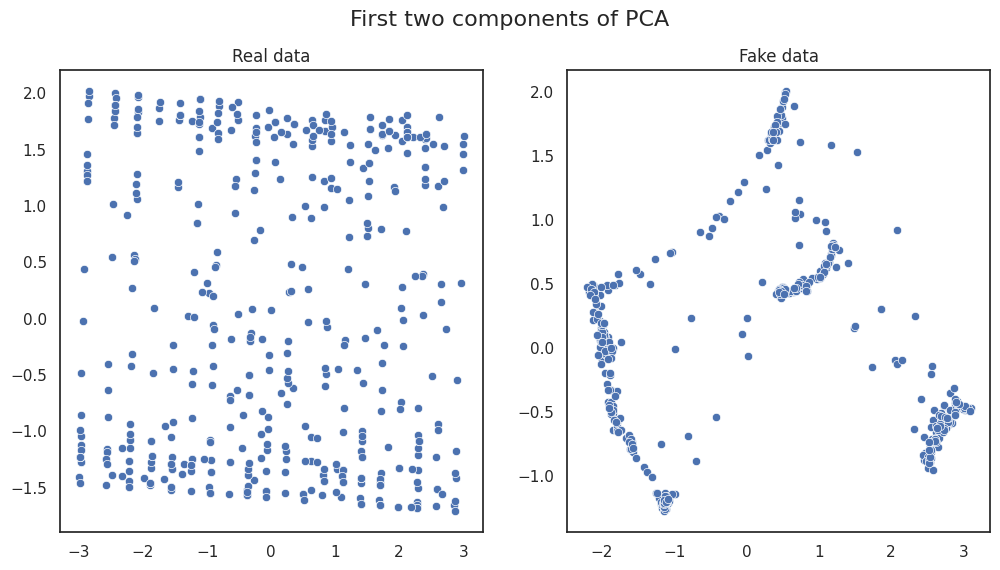

In [ ]:
from table_evaluator import load_data, TableEvaluator

print(len(df), len(gen_samples))
table_evaluator =  TableEvaluator(df, gen_samples)

table_evaluator.visual_evaluation()

In [ ]:
pwt_inverse=pw.inverse_transform(gen_samples)
# gen_samples.drop(['Unnamed: 0'],axis=1,inplace=True)
df_gen = pd.DataFrame(pwt_inverse, columns=gen_samples.columns)
df_gen

,task_type,customer_satisfaction,customer_problem_resolved,user_team,creation_date,view_date,action_date
0,-1.161861,0.807598,0.837643,-1.542558,-0.604644,-0.470414,-0.480277
1,-1.123160,0.177226,0.831428,-0.343472,0.920292,0.841099,0.843230
2,-1.118647,1.070135,0.830815,1.329270,0.631038,0.522761,0.528033
3,1.005709,-0.419201,0.819519,1.173318,1.278945,1.304961,1.308982
4,1.017503,-0.447480,0.819979,0.483804,1.361880,1.395727,1.404632
...,...,...,...,...,...,...,...
487,-1.073575,0.429516,0.822174,-0.316730,0.742851,0.668324,0.670611
488,1.037739,-0.446437,0.825686,1.252338,1.284335,1.320218,1.327193
489,-1.089010,0.626306,0.824617,1.236686,0.627637,0.530421,0.526195
490,-0.512813,0.453036,0.821500,1.232125,0.650984,0.556951,0.552075


In [ ]:
gen_samples

,task_type,customer_satisfaction,customer_problem_resolved,user_team,creation_date,view_date,action_date
0,-1.147438,0.786415,0.845287,-1.495795,-0.650661,-0.532807,-0.541926
1,-1.113005,0.071810,0.834174,-0.380649,0.922469,0.831920,0.834371
2,-1.108983,1.108569,0.833079,1.366511,0.596514,0.472982,0.478802
3,1.010606,-0.511443,0.812969,1.194838,1.340308,1.379360,1.384219
4,1.023766,-0.537056,0.813786,0.454306,1.438888,1.489501,1.500357
...,...,...,...,...,...,...,...
487,-1.068745,0.346867,0.817686,-0.354718,0.721256,0.635260,0.637834
488,1.046372,-0.536113,0.823933,1.281651,1.346694,1.397808,1.406251
489,-1.082540,0.571838,0.822031,1.264427,0.592747,0.481441,0.476773
490,-0.555489,0.373297,0.816487,1.259411,0.618646,0.510805,0.505400


In [ ]:
df

,task_type,customer_satisfaction,customer_problem_resolved,user_team,creation_date,view_date,action_date
0,-1.073125,1.162852,0.827927,-0.407942,-1.730564,-1.728689,-1.728689
1,-1.073125,-0.028697,0.827927,-0.407942,-1.730564,-1.728689,-1.728689
2,1.036667,-0.028697,0.827927,-0.407942,-1.730564,-1.728689,-1.728689
3,1.036667,-0.624649,-1.207835,-0.407942,-1.730564,-1.728689,-1.728689
4,-1.073125,1.162852,0.827927,-0.407942,-1.730564,-1.728689,-1.728689
...,...,...,...,...,...,...,...
306414,0.136801,-0.028697,-1.207835,0.479175,1.698257,1.632434,1.632434
306415,-1.073125,-1.273219,-1.207835,0.479175,0.185750,1.632434,1.632434
306416,1.036667,-1.273219,-1.207835,0.479175,0.527640,1.632434,1.632434
306417,0.136801,-1.273219,-1.207835,0.479175,1.698257,1.632434,1.632434
